## Part1

In [24]:
#import tensorflow and numpy
import tensorflow as tf
import numpy as np

In [25]:
#confirm TF version
print("TF  version:", tf.__version__)

TF  version: 2.6.0


In [26]:
#set value
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [27]:
#Create constant tensor
xs = tf.constant(X.astype(np.float32))
ys = tf.constant(Y.astype(np.float32))

In [28]:
#Compute Gaussian
#mu = 0, sig=1
zs = tf.exp(-(xs**2+ys**2)/2.0)

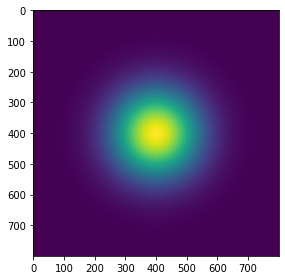

In [29]:
#Visualise the result with Gaussian
import matplotlib.pyplot as plt

plt.imshow(zs.numpy()) #transform into numpy array from tensor
plt.tight_layout() #adjust the padding between and around subplots
plt.show()

Change the Gaussian functoin into 2D sin function

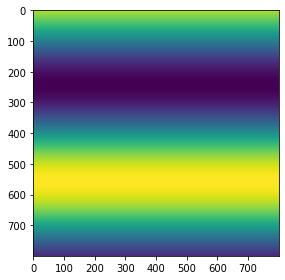

In [34]:
#Change the Gaussian function into a 2D sine or cosine function
zs2 = tf.sin(xs)
plt.imshow(zs2.numpy())
plt.tight_layout()
plt.show()

Gabor filter

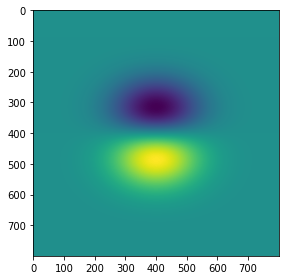

In [31]:
#multiply both the Gaussian and the sine/cosine function together abd visualise this combined function
zs3 = zs*zs2
plt.imshow(zs3.numpy())
plt.tight_layout()
plt.show()

From the result, we can see that the sine images focused with Gaussian function.

## Part2

The example with Mandelbrot is

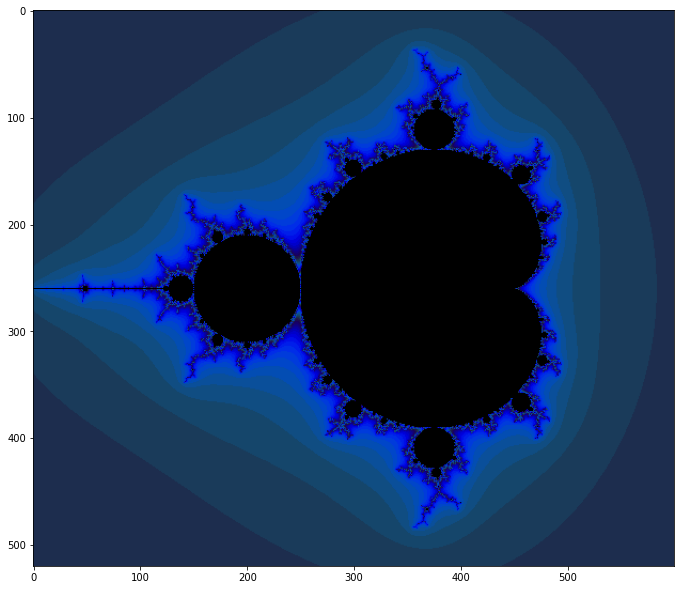

In [35]:
import tensorflow as tf
import numpy as np

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64)) #can't changed
zs = tf.Variable(xs) #can change with tf.assign()
ns = tf.Variable(tf.zeros_like(xs, tf.float32)) #zeros_like make all elements 0 

#Mandelbrot Set
for i in range(1000):
  #Compute the new values of z: z^2 +x
  zs_ = zs*zs +xs
  #Have we diverged with this new value?
  not_deverged = tf.abs(zs_)<4 #tf.abs is absolute value

  #Update variables to compute
  ns.assign_add(tf.cast(not_deverged, tf.float32)) #assign_add updates variable
  zs.assign(zs_)

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(12,8))

def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                       155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a= img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

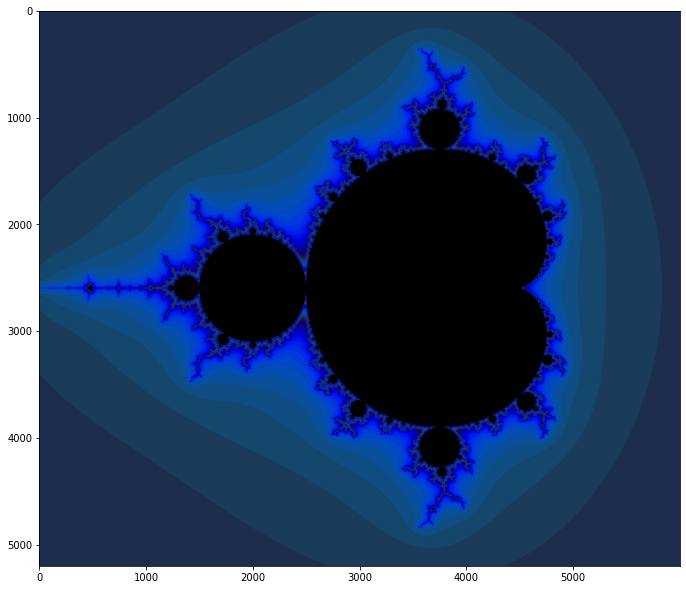

In [14]:
import tensorflow as tf
import numpy as np

Y, X = np.mgrid[-1.3:1.3:0.0005, -2:1:0.0005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64)) #can't changed
zs = tf.Variable(xs) #can change with tf.assign()
ns = tf.Variable(tf.zeros_like(xs, tf.float32)) #zeros_like make all elements 0 

#Mandelbrot Set
for i in range(1000):
  #Compute the new values of z: z^2 +x
  zs_ = zs*zs +xs
  #Have we diverged with this new value?
  not_deverged = tf.abs(zs_)<4 #tf.abs is absolute value

  #Update variables to compute
  ns.assign_add(tf.cast(not_deverged, tf.float32)) #assign_add updates variable
  zs.assign(zs_)

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(12,8))

def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                       155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a= img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

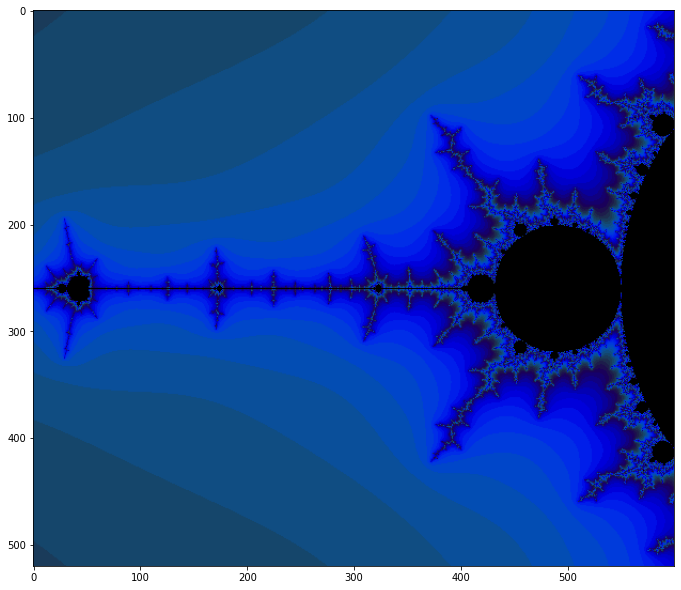

In [36]:
import tensorflow as tf
import numpy as np

Y, X = np.mgrid[-1.3:1.3:0.005, -9:-6:0.005]
Z = 0.2*(X+1j*Y)

xs = tf.constant(Z.astype(np.complex64)) #can't changed
zs = tf.Variable(xs) #can change with tf.assign()
ns = tf.Variable(tf.zeros_like(xs, tf.float32)) #zeros_like make all elements 0 

#Mandelbrot Set
for i in range(1000):
  #Compute the new values of z: z^2 +x
  zs_ = zs*zs +xs
  #Have we diverged with this new value?
  not_deverged = tf.abs(zs_)<4 #tf.abs is absolute value

  #Update variables to compute
  ns.assign_add(tf.cast(not_deverged, tf.float32)) #assign_add updates variable
  zs.assign(zs_)

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(12,8))

def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                       155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a= img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

High resolution computation of the set by decresing the mgrid spacing and zoom the another part of the Mandelbrot set

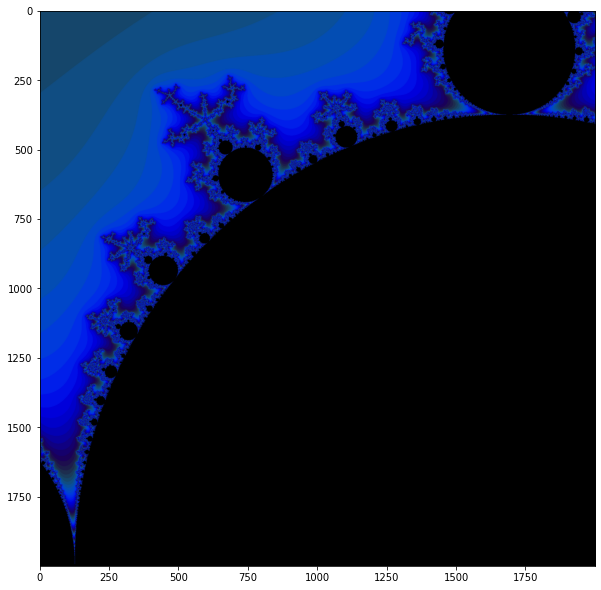

In [37]:
#Modify the code so to show a Julia set rather than the Mandelbrot set

Y, X = np.mgrid[-1.0:0:0.0005, -1.0:0:0.0005] #between -1 to 0 by 0.0005
Z = 0.8*(X+1j*Y)

xs = tf.constant(Z.astype(np.complex64)) #can't changed
zs = tf.Variable(xs) #can change with tf.assign()
ns = tf.Variable(tf.zeros_like(xs, tf.float32)) #zeros_like make all elements 0 


#Mandelbrot Set
for i in range(1000):
  #Compute the new values of z: z^2 +x
  zs_ = zs*zs +xs
  #Have we diverged with this new value?
  not_deverged = tf.abs(zs_)<4 #tf.abs is absolute value

  #Update variables to compute
  ns.assign_add(tf.cast(not_deverged, tf.float32)) #assign_add updates variable
  zs.assign(zs_)

fig = plt.figure(figsize =(12,8))

def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                       155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a= img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

Modify the code for Julia set

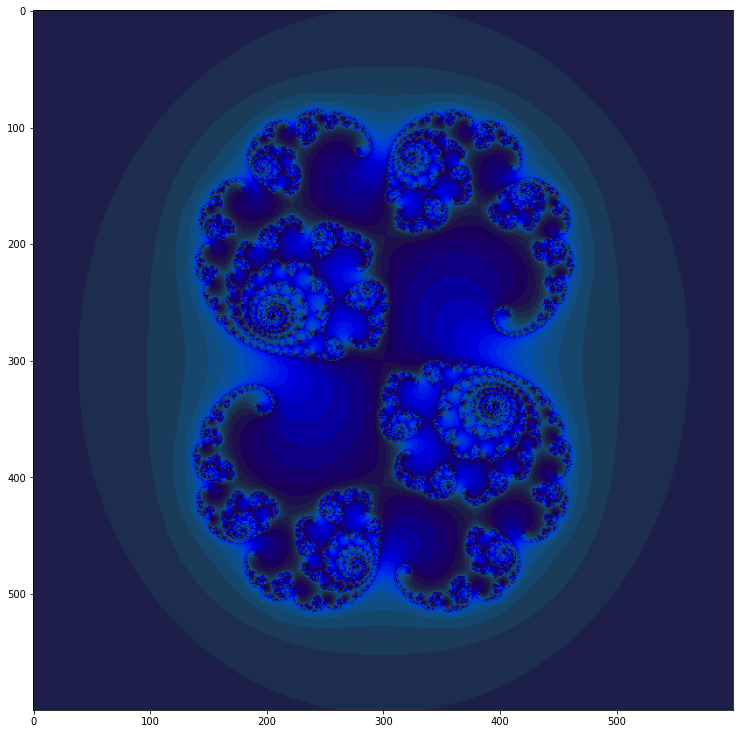

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#grid
Y, X = np.mgrid[-1.5:1.5:0.005, -1.5:1.5:0.005] #between -1.5 to 1.5 by 0.005
Z = X+1j*Y

#Julia Set
#z0 is variable, xs is constant
xs = tf.constant(Z.astype(np.complex64))

zs = tf.Variable(xs) #variable
ns = tf.Variable(tf.zeros_like(xs, tf.float32))
c = 0.285 + 1j*0.01 #constant

for i in range(200):
  #Compute the new values of z: z^2 + c
  zs_ = zs*zs + c
  #Have we diverged with this new value?
  not_deverged = tf.abs(zs_) < 2 #zs_ less than 2 or not

  #Update variables to compute
  ns.assign_add(tf.cast(not_deverged, tf.float32)) #assign_add updates variable
  zs.assign(zs_)


#visualization
fig = plt.figure(figsize =(16,10))

def processFractal(a):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                       155-80*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a= img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

# Part3

Sierpinski triangle

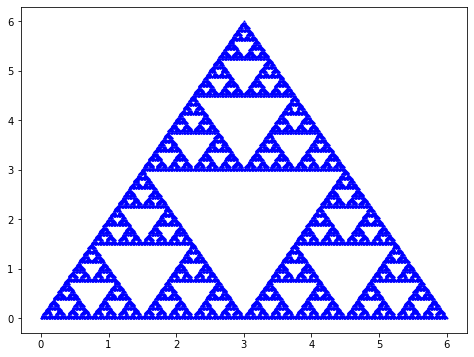

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#iteration
iterations = 9

#triangle initial points
triangle_points = tf.Variable([[0.0, 3.0, 6.0, 0.0], [0.0, 6.0, 0.0, 0.0]], dtype=tf.float32)

#scale matrix
A = 1/2*tf.constant([[1.0, 0.0],[0.0, 1.0]])

for n in range(1, iterations):
  #make scaled triangle by scaled matrix
  scale_shape = (tf.linalg.matmul(A, triangle_points))
  triangle_points = scale_shape
  
  #make other part 1 and 2
  move1 = tf.constant([[1.5], [3.0]])
  triangle_points1 = tf.add(triangle_points, move1)

  move2 = tf.constant([[3.0], [0.0]])
  triangle_points2 = tf.add(triangle_points, move2)

  #update triangle points
  triangle_points = tf.concat([triangle_points, triangle_points1, triangle_points2], 1)

# Plot coordinates
plt.figure(figsize =(8,6))
plt.scatter(triangle_points[0].numpy(), triangle_points[1].numpy(), color = 'b', s=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  del sys.path[0]


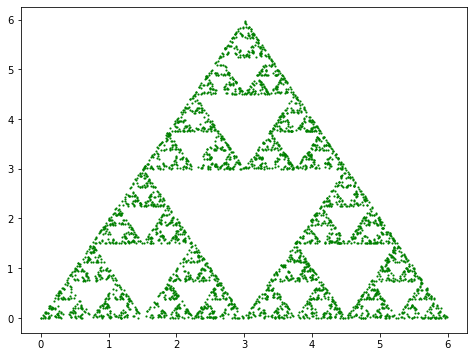

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#iteration
iterations = 4000

# tensors for storing x, y
X = tf.Variable(np.zeros(iterations))
Y = tf.Variable(np.zeros(iterations))

#random numbers 
rand_num = np.random.random_integers(0, 2, size=(iterations,))

#triangle initial points
triangle_points = tf.constant([[0.0, 3.0, 6.0], [0.0, 6.0, 0.0]], dtype=tf.float64)

# Run step several times to generate each coord
for n in range(1, iterations):
  
  #choice triangle point
  r = rand_num[n]

  #get previous point
  prev_y = tf.gather(Y, [n-1])
  prev_x = tf.gather(X, [n-1])
  
  #compute next point: (triangle point+previous point)/2
  next_y = tf.add(triangle_points[1][r], prev_y)/2
  next_x = tf.add(triangle_points[0][r], prev_x)/2
    
  idx = tf.constant([[n]])

  #update tensor
  X = tf.tensor_scatter_nd_update(X, idx, next_x)
  Y = tf.tensor_scatter_nd_update(Y, idx, next_y)

# Plot coordinates
plt.figure(figsize =(8,6))
plt.scatter(X.numpy(),Y.numpy(), color = 'g', marker = '.', s=5)
plt.show()

Another Challenge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  del sys.path[0]


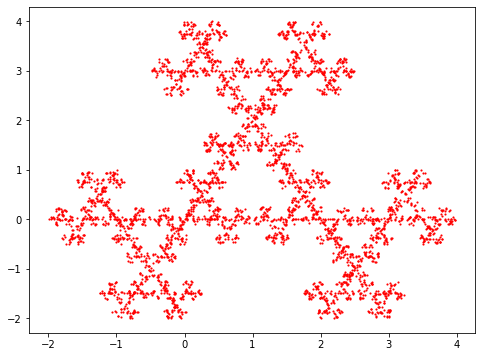

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#iteration
iterations = 4000

# tensors for storing x, y coords
X = tf.Variable(np.zeros(iterations))
Y = tf.Variable(np.zeros(iterations))

#random numbers 
rand_num = np.random.random_integers(0, 2, size=(iterations,))

#triangle initial points
triangle_points = tf.constant([[0.0, 3.0, 6.0], [0.0, 6.0, 0.0]], dtype=tf.float64)

# Run step several times to generate each coord
for n in range(1, iterations):
    r = rand_num[n]

    prev_y = tf.gather(Y, [n-1])
    prev_x = tf.gather(X, [n-1])
  
    next_y = tf.subtract(triangle_points[1][r],  prev_y)/2
    next_x = tf.subtract(triangle_points[0][r],  prev_x)/2
    
    idx = tf.constant([[n]])

    X = tf.tensor_scatter_nd_update(X, idx, next_x)
    Y = tf.tensor_scatter_nd_update(Y, idx, next_y)

# Plot coordinates
plt.figure(figsize =(8,6))
plt.scatter(X.numpy(), Y.numpy(), color = 'r', marker = '.', s=5)
plt.show()